# Aprendiendo Fashion-MNIST con PyTorch

## Refs.

* https://pytorch.org/tutorials/beginner/basics/optimization_tutorial.html

* https://github.com/zalandoresearch/fashion-mnist

* https://github.com/pranay414/Fashion-MNIST-Pytorch/blob/master/fashion_mnist.ipynb

## **Ejercicio 1)** Importando librerías

**0)** De ser necesario, **instale PyTorch** escribiendo

    !pip3 install torch torchvision torchaudio torchviz

**1)** Importe las librerías estandard de Python: `os`, `datetime`, `collections` y `pickle`.

**2)** Importe las siguientes librerías third party de Python: `matplotlib.pyplot`, `numpy`, `scipy`, `sklearn`, `pandas`, `dill` y `json`.

**3)** Importe las librerias necesarias de **PyTorch**: `torch` y `torchvision`.

**4)** Importe la librería: `google.colab`.

In [1]:
# 1.0)
!pip3 install torch torchvision torchaudio torchviz


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
# 1.1)
import os
import pickle
import datetime
from collections import defaultdict

In [4]:
!pip install scikit-learn

   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---------------------------------- ----- 7.6/8.7 MB 52.4 MB/s eta 0:00:01
   ---------------------------------------- 8.7/8.7 MB 49.5 MB/s eta 0:00:00

   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   -------------------------- ------------- 2/3 [scikit-learn]
   -------------------------- ------------- 2/3 [scikit-learn]
   -------------------------- ------------- 2/3 [scikit-learn]
   -------------------------- ------------- 2/3 [scikit-learn]
   -------------------------- ------------- 2/3 [scikit-learn]
   -------------------------- ------------- 2/3 [scikit-learn]


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# 1.2)
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import scipy as sp
import scipy.linalg as linalg
import sklearn as skl
import pandas as pd
#import dill
import json

In [3]:
# 1.3)
import torch
import torch.optim as optim
from torch import nn
from torch.nn import functional as F
from torch.utils.data import Dataset, DataLoader, Subset, random_split
from torchvision import datasets
from torchvision import transforms
from torchvision.io import read_image
from torchvision.transforms import ToTensor, Lambda, Compose
#from torchviz import make_dot

In [7]:
# 1.4)
import google.colab
from google.colab import files

ModuleNotFoundError: No module named 'google'

## **Ejercicio 2)**

Bajando y Jugando con el dataset **Fashion-MNIST**.

**1)** Baje y transforme (i.e. normalize los valores de los pixeles) los conjuntos de entrenamiento y testeo de FashionMNIST.

**2)** Explore algunos ejemplos de estos conjuntos. Que formato poseen?

**3)** Visitando la página web de FashionMNIST, cree un diccionario de Python `Dict()` asociando cada categoría a un nombre adecuado de la misma.

**4)** Grafique un mosaico de 3x3 imagenes de FashionMNIST, cada una titulada con su respectiva clasificación

In [5]:
# 2.1)
# Define a transform to normalize the data
transform = transforms.Compose([
                                transforms.ToTensor()
                                ,transforms.Normalize((0.5,), (0.5,))
                                #,transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                               ])

# Download and load the training data
train_set = datasets.FashionMNIST('MNIST_data/', download = True, train = True,  transform = transform)
valid_set = datasets.FashionMNIST('MNIST_data/', download = True, train = False, transform = transform)

Image shape: torch.Size([1, 28, 28])
Label: 0


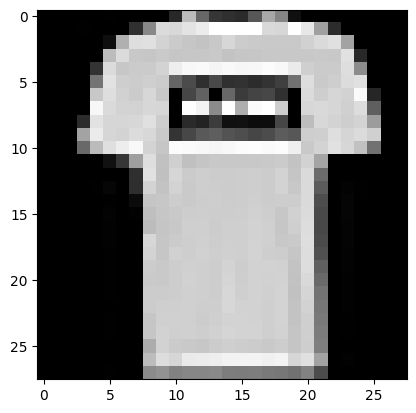

In [6]:
# 2.2)
image, label = train_set[1]
print(f'Image shape: {image.shape}')
print(f'Label: {label}')
plt.imshow(image.squeeze(), cmap='gray')
plt.show()

In [7]:
# 2.3)
label_dict = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}
print(label_dict)

{0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}


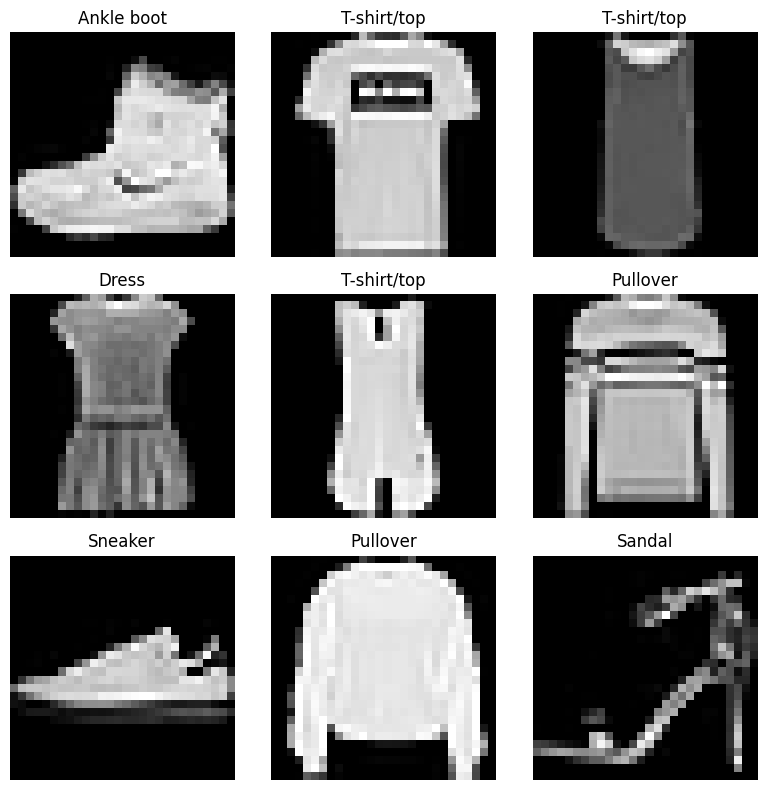

In [8]:
# 2.4)
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    image, label = train_set[i]
    ax.imshow(image.squeeze(), cmap='gray')
    ax.set_title(label_dict[label])
    ax.axis('off')
plt.tight_layout()
plt.show()

## Ejercicio 3)

Creando un `DataLoader` para alimentar el modelo con batchs (lotes) de entrenamiento.

**1)** Cree los `DataLoader`s para cada conjunto. Defínalos con un `batch_size` de 100 y con el flag `shuffle` seteado a `True`.

**2)** Use uno de los `DataLoader`s creados anteriormente para explorar algunos elementos del conjunto.

Notar que, el iterador devuelve el batch en un par `(image,label)`.

El objeto `images` es un tensor de dimensiones `(100,1,28,28)`.
El 100 es el tamaño del batch.
El 1 porque hay un solo canal (en este caso, un canal de escala de grises, pero podría haber varios, p. ej. uno por cada color de {Red, Green Blue} en caso que fuesen imagenes a color).
Luego, 28 y 28 porque cada imagen del dataset es de 28 x 28 píxeles.

El objeto `labels` es un tensor de dimensiones `(100,)`.
La $i$-ésima entrada `labels[i]` de `labels` es un número en $\{0,1,...,9\}$ indicando la categoría a la que pertenece la $i$-ésima imagen en el batch, guardada en `images[i]`.

In [9]:
# 3.1)
train_loader = torch.utils.data.DataLoader(train_set, batch_size = 100, shuffle = True)
valid_loader = torch.utils.data.DataLoader(valid_set, batch_size = 100, shuffle = True)

Images batch shape: torch.Size([100, 1, 28, 28])
Labels batch shape: torch.Size([100])
Labels: tensor([2, 8, 4, 4, 3, 2, 2, 9, 1, 7, 1, 7, 5, 5, 6, 7, 3, 5, 8, 7, 6, 1, 5, 8,
        9, 7, 9, 9, 0, 4, 0, 0, 3, 2, 2, 2, 8, 6, 8, 3, 0, 5, 5, 5, 6, 7, 9, 4,
        2, 5, 1, 7, 4, 7, 6, 1, 7, 9, 5, 6, 9, 6, 1, 7, 4, 5, 1, 2, 8, 2, 7, 6,
        0, 4, 6, 6, 2, 7, 2, 8, 5, 0, 9, 0, 6, 3, 0, 3, 9, 5, 2, 0, 4, 0, 6, 3,
        5, 8, 6, 0])


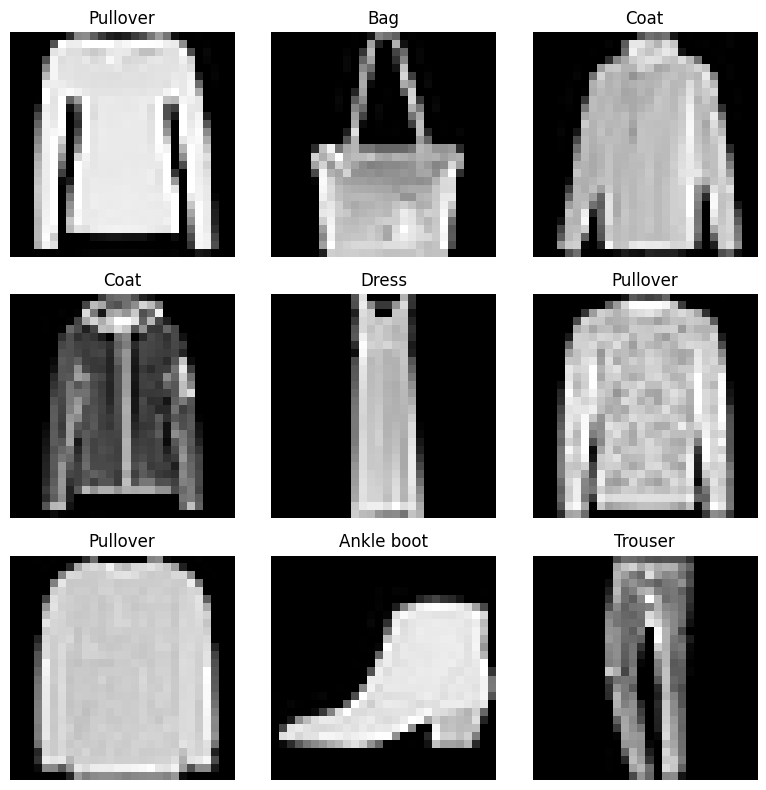

In [12]:
# 3.2)
dataiter = iter(train_loader)
images, labels = next(dataiter)
print(f'Images batch shape: {images.shape}')
print(f'Labels batch shape: {labels.shape}')
print(f'Labels: {labels}')

fig, axes = plt.subplots(3, 3, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i].squeeze(), cmap='gray')
    ax.set_title(label_dict[labels[i].item()])
    ax.axis('off')
plt.tight_layout()
plt.show()

## Ejercicio 4)

Defina una red neuronal de 4 capas, una de entrada, dos ocultas de $n_1=128$ y $n_2=64$ neuronas, respectivamente, y una de salida de 10 neuronas.

En las capas intermedias utilice neuronas tipo ReLU y agregueles un *dropout* de p=0.2.
En la capa de salida no utilice funciones de activación ni dropout.

Las capas sucesivas tienen que estar totalmente conectadas entre si.

In [19]:
# 4)
class NeuralNetwork(nn.Module):
    def __init__(self, n1, n2, p=0.2):
        super(NeuralNetwork, self).__init__()
        # Capa 0
        self.flatten = nn.Flatten()     #
        
        # Capa 1
        self.fc1 = nn.Linear(28*28, n1) # fully connected
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p)

        # Capa 2
        self.fc2 = nn.Linear(n1, n2)    # fully connected
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p)

        # Capa 3        
        self.fc3 = nn.Linear(n2, 10)    # fully connected

    def forward(self, x):
        # Capa 0
        x = self.flatten(x)

        # Capa 1
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)

        # Capa 2
        x = self.fc2(x)
        x = self.relu(x)
        x = self.dropout(x)

        # Capa 3
        x = self.fc3(x)
        return x

## Ejercicio 5)

Entrenamos el modelo

**1)** Implemente, en una función, un loop de entrenamiento que recorra los batchs (lotes).

**2)** Implemente, en una función, un loop de validación que recorra los batchs.

**3)** Inicialize dos `DataLoader`s llamados `train_loader` y `valid_loader` a partir del `train_set` (conjunto de entranmiento) y del `valid_set` (conjunto de validación) de Fashion-MNIST, respectivamente, y que usen batchs de 100 ejemplos.

**4)** Cree una función de pérdida usando la **Cross Entropy Loss**.

**IMPORTANTE:** Notar que la **Cross Entropy Loss** aplica automáticamente una `log_softmax`.

**5)** Cree un optimizador que utilice el método de **Stochastic Gradient Descent** con un learning rate igual a $10^{-3}$.

**6)** Cree una instancia del modelo.

**7)** Especifique en que dispositivo (`device`) va a trabajar: en una **CPU** o en una **GPU**.

**8)** Implemente un loop de entrenamiento y validación que trabaje con el `train_loader` y el `valid_loader`, respectivamente, usando un numero arbitrario de épocas.
Este loop debe guardar en cuatro listas los valores de los promedios del **Cross Entropy Loss** y las fracciones de clasificaciones correctas o **precisión** (accuracy) sobre el conjunto de **entrenamiento** y el de **validación**, respectivamente.

**IMPORTANTE:** No olvide copiar los batchs al dispositivo de trabajo.

**9)** Entrene y valide el modelo.

**10)** Use las listas del inciso anterior para graficar en función de las épocas la **Cross Entropy Loss** de **entrenamiento** y de **validación**.
Realize un gráfico análogo pero con la **precisión**.
Discuta y comente, cual es el número óptimo de épocas de entrenamiento?

**11)** Repita los experimentos variando hiperparámetros. Por ejemplo:

- El learning-rate.
- El optimizador (ej. puede usar ADAM).
- El valor de dropout.
- El número de neuronas en las capas intermedias.
- El número de épocas de entrenamiento.
- El tamaño de los lotes.

Discuta los resultados.

In [30]:
# 5.1)
def train_loop(dataloader, model, loss_fn, optimizer):
    model.train()
    num_samples = len(dataloader.dataset)
    num_batches = len(dataloader)
    sum_loss = 0
    sum_correct = 0
    sum_samples = 0
       
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        batch_size = len(X)
        sum_samples += batch_size
        pred = model(X)
        loss = loss_fn(pred, y)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        sum_loss += loss.item() * batch_size
        sum_correct += (pred.argmax(dim=1) == y).type(torch.float).sum().item()
    
        if batch % (num_batches/10) == 0:
            avrg_loss = sum_loss / sum_samples
            precision = sum_correct / sum_samples
            print(f"@train_loop batch={batch:>5d} avrg_loss={avrg_loss:>7f} processed-samples={100*sum_samples/num_samples:>5f}%")
    
    assert num_samples == sum_samples
    avrg_loss = sum_loss / sum_samples
    precision = sum_correct / sum_samples
    return avrg_loss, precision


In [31]:
# 5.2)

def eval_loop(dataloader, model, loss_fn):
    model.eval()
    num_samples = len(dataloader.dataset)
    num_batches = len(dataloader)
    sum_correct = 0
    sum_loss = 0
    sum_samples = 0

    with torch.no_grad():
        for X, y in dataloader:
            X = X.to(device)
            y = y.to(device)
            batch_size = len(X)
            sum_samples += batch_size
            pred = model(X)
            loss = loss_fn(pred, y)
            sum_loss += loss.item() * batch_size
            sum_correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    assert sum_samples == num_samples
    avrg_loss = sum_loss / sum_samples
    precision = sum_correct / sum_samples
    print(f'eval_loop avg_loss={avrg_loss:>8f} precision={100*precision:>0.1f}%')
    return avrg_loss, precision


In [32]:
# 5.3)
batch_size = 100
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_set, batch_size=batch_size, shuffle=True)


In [33]:
# 5.4
loss_fn = nn.CrossEntropyLoss()

In [34]:
# 5.5)
n1 = 128
n2 = 64
p = 0.2
model = NeuralNetwork(n1, n2, p=p)

In [35]:
# 5.6)
learning_rate = 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, eps=1e-08, weight_decay=0, amsgrad=False)

In [36]:
# 5.7)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

In [37]:
# 5.8) y 5.9)
num_epochs = 30
list_train_avg_loss_incorrecta = []
list_valid_avg_loss = []
list_train_avg_loss = []
list_train_precision_incorrecta = []
list_train_precision = []
list_valid_precision = []

for epoch in range(num_epochs):
    print(f"Epoch {epoch+1}\n-------------------------------")
    train_avg_loss_incorrecta, train_precision_incorrecta = train_loop(train_loader, model, loss_fn, optimizer)
    train_avg_loss, train_precision = eval_loop(train_loader, model, loss_fn)
    valid_avg_loss, valid_precision = eval_loop(valid_loader, model, loss_fn)

    list_valid_avg_loss.append(valid_avg_loss)
    list_train_avg_loss.append(train_avg_loss)
    list_train_avg_loss_incorrecta.append(train_avg_loss_incorrecta)
    list_train_precision_incorrecta.append(train_precision_incorrecta)
    list_train_precision.append(train_precision)
    list_valid_precision.append(valid_precision)

print("Done!")

Epoch 1
-------------------------------
@train_loop batch=    0 avrg_loss=2.298653 processed-samples=0.166667%
@train_loop batch=   60 avrg_loss=1.187532 processed-samples=10.166667%
@train_loop batch=  120 avrg_loss=0.953982 processed-samples=20.166667%
@train_loop batch=  180 avrg_loss=0.838254 processed-samples=30.166667%
@train_loop batch=  240 avrg_loss=0.773741 processed-samples=40.166667%
@train_loop batch=  300 avrg_loss=0.728367 processed-samples=50.166667%
@train_loop batch=  360 avrg_loss=0.693738 processed-samples=60.166667%
@train_loop batch=  420 avrg_loss=0.666119 processed-samples=70.166667%
@train_loop batch=  480 avrg_loss=0.643176 processed-samples=80.166667%
@train_loop batch=  540 avrg_loss=0.628621 processed-samples=90.166667%
eval_loop avg_loss=0.428019 precision=84.3%
eval_loop avg_loss=0.464243 precision=82.7%
Epoch 2
-------------------------------
@train_loop batch=    0 avrg_loss=0.488787 processed-samples=0.166667%
@train_loop batch=   60 avrg_loss=0.462609